# Introduction to PyTorch

In this notebook, you'll get introduced to [PyTorch](https://pytorch.org/), a framework for building and training neural networks. PyTorch [tensors](https://pytorch.org/docs/stable/tensors.html) in a lot of ways behave like the arrays from Numpy.  PyTorch takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. It also provides a module that automatically calculates gradients (for [backpropagation](https://ruder.io/optimizing-gradient-descent/)) and another module specifically for building neural networks. 

## Neural Networks

Deep Learning is based on artificial neural networks. In a simplest case each unit of a network has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function (Sigmoid, ReLu, etc.) to get the unit's output.

<img src="https://drive.google.com/uc?export=view&id=1Rc3W_y6pWC-xa956-chHvlg88JgSNUmS" width=400px>

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

## Tensors 

Neural network computations are just a combination of linear algebra operations on tensors, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch is built around tensors.

<img src="https://drive.google.com/uc?export=view&id=1NHF80MEDXyHo_1Wsq7xvuLdtMFEZSgcK" width=600px>

## First operations on tensors

In [ ]:
# First, import PyTorch
import torch

**torch.tensor()** converts the list to the tensor type, which is similar to the original list type

In [ ]:
ints_to_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.int64
The type of tensor object after converting it to tensor:  torch.LongTensor


In [ ]:
floats_to_tensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print("The dtype of tensor object after converting it to tensor: ", floats_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", floats_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.float32
The type of tensor object after converting it to tensor:  torch.FloatTensor


In [ ]:
# Convert 2D List to 2D Tensor

twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
print("The New 2D Tensor: ", twoD_tensor)

The New 2D Tensor:  tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])


In [ ]:
# Try tensor_obj.ndimension(), tensor_obj.shape, tensor_obj.size()

print("The dimension of twoD_tensor: ", twoD_tensor.ndimension())
print("The shape of twoD_tensor: ", twoD_tensor.shape)
print("The shape of twoD_tensor: ", twoD_tensor.size())

The dimension of twoD_tensor:  2
The shape of twoD_tensor:  torch.Size([3, 3])
The shape of twoD_tensor:  torch.Size([3, 3])


In [ ]:
# Convert a integer list with length 5 to float tensor

new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
new_float_tensor.type()
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


In [ ]:
# Change tensor type

old_int_tensor = torch.tensor([0, 1, 2, 3, 4])
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


In [ ]:
# Introduce the tensor_obj.size() & tensor_ndimension.size() methods

print("The size of the new_float_tensor: ", new_float_tensor.size())
print("The dimension of the new_float_tensor: ",new_float_tensor.ndimension())

The size of the new_float_tensor:  torch.Size([5])
The dimension of the new_float_tensor:  1


## CPU or GPU?

If you perform simple operations on small tensors and especially if you have to move tensors to device with high frequency, CPU could be better option, but generally, we already know, that for big tensor operations GPU performs much faster, so that you can move every tensor to any available device

* ensure device availability and get it's id (index)
* move all the tesors to be used in same operation to the same device
* perform operation

In [ ]:
# You can move every tensor to GPU

print(torch.cuda.device_count())
torch.cuda.get_device_name(0)

1


'Tesla V100-SXM2-16GB'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

gpu_tensor = new_float_tensor.to(device)
gpu_tensor

tensor([0., 1., 2., 3., 4.], device='cuda:0')

If you try combine tensors from different devices (gpu_tensor + new_float_tensor) - you will get an error.

```RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!```

In [ ]:
new_float_tensor + gpu_tensor

RuntimeError: ignored

**tensor_obj.view(dimension1, dimension2, ...)** - is used for reshaping a tensor object.

In [ ]:
twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method: \n", twoD_float_tensor)
print(twoD_float_tensor.size())

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method: 
 tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
torch.Size([5, 1])


If you have a tensor with dynamic size and you want to reshape it, you can use -1 to do that. You can explicitly specify the size of some dimensions and let Pytorch to calculate the size of certain dimenson (with -1 size) in a way that it will fit the data.

In [ ]:
# Introduce the use of -1 in tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)
print(twoD_float_tensor.size())

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
torch.Size([5, 1])


You can convert numpy array to a tensor and vice versa.

In [ ]:
import numpy as np

numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
new_tensor = torch.from_numpy(numpy_array)

print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

# Convert a tensor to a numpy array

back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor
The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64


### Practice

Create 1-dimensional tensor and convert it to 1X2X3 tensor using -1 in **view** method.

In [ ]:
## TODO



## Indexing and Slicing

Indexing in Pytorch works much like indexing in numpy.

In [ ]:
index_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The value on index 0:",index_tensor[0])
print("The value on index 1:",index_tensor[4])

The value on index 0: tensor(0)
The value on index 1: tensor(4)


In [ ]:
tensor_sample = torch.tensor([20, 1, 2, 3, 4])
tensor_sample[0] = 100
print("Modified tensor:", tensor_sample)

Modified tensor: tensor([100,   1,   2,   3,   4])


In [ ]:
# Slice tensor_sample

subset_tensor_sample = tensor_sample[1:4]
print("Original tensor sample: ", tensor_sample)
print("The subset of tensor sample:", subset_tensor_sample)

Original tensor sample:  tensor([100,   1,   2,   3,   4])
The subset of tensor sample: tensor([1, 2, 3])


In [ ]:
# Use tensor_obj[begin_row_number: end_row_number, begin_column_number: end_column number] 
# and tensor_obj[row][begin_column_number: end_column number] to do the slicing

tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
print("What is the value on 1st-row first two columns? ", tensor_example[0, 0:2])
print("What is the value on 1st-row first two columns? ", tensor_example[0][0:2])

What is the value on 1st-row first two columns?  tensor([11, 12])
What is the value on 1st-row first two columns?  tensor([11, 12])


You can also assign the value to the slices.

In [ ]:
# Change the values on index 3 and index 4

print("Inital value on index 3 and index 4:", tensor_sample[3:5])
tensor_sample[3:5] = torch.tensor([300.0, 400.0])
print("Modified tensor:", tensor_sample)

Inital value on index 3 and index 4: tensor([3, 4])
Modified tensor: tensor([100,   1,   2, 300, 400])


In [ ]:
# Using variable to contain the selected index, and pass it to slice operation

selected_indexes = [3, 4]
subset_tensor_sample = tensor_sample[selected_indexes]
print("The inital tensor_sample", tensor_sample)
print("The subset of tensor_sample with the values on index 3 and 4: ", subset_tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
The subset of tensor_sample with the values on index 3 and 4:  tensor([300, 400])


## Tensor Functions

In [ ]:
math_tensor = torch.tensor([1.0, -1.0, 1, -1])
print("Tensor example: ", math_tensor)

mean = math_tensor.mean()
print("The mean of math_tensor: ", mean)

standard_deviation = math_tensor.std()
print("The standard deviation of math_tensor: ", standard_deviation)

Tensor example:  tensor([ 1., -1.,  1., -1.])
The mean of math_tensor:  tensor(0.)
The standard deviation of math_tensor:  tensor(1.1547)


In [ ]:
# Sample for introducing max and min methods

max_min_tensor = torch.tensor([1, 1, 3, 5, 5])
print("Tensor example: ", max_min_tensor)

# Method for finding the maximum value in the tensor
max_val = max_min_tensor.max()
print("Maximum number in the tensor: ", max_val)

# Method for finding the minimum value in the tensor
min_val = max_min_tensor.min()
print("Minimum number in the tensor: ", min_val)

Tensor example:  tensor([1, 1, 3, 5, 5])
Maximum number in the tensor:  tensor(5)
Minimum number in the tensor:  tensor(1)


In [ ]:
# Method for calculating the sin result of each element in the tensor

pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("The sin result of pi_tensor: ", sin)

The sin result of pi_tensor:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


In [ ]:
# First try on using linspace to create tensor

len_5_tensor = torch.linspace(-2, 2, steps = 5)
print ("First Try on linspace", len_5_tensor)

First Try on linspace tensor([-2., -1.,  0.,  1.,  2.])


In [ ]:
# Create tensors filled with default values
ones_tensor = torch.ones(2, 3)
print(ones_tensor)

zeros_tensor = torch.zeros(2, 3)
print(zeros_tensor)

zeros_like_tensor = torch.zeros_like(len_5_tensor)
print(zeros_like_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0., 0., 0., 0.])


### Practice

Create a random tensor, get subset of it, get cos and plot results with matplotlib. 


In [ ]:
#TODO

## Tensor Operations

In [ ]:
# Create two sample tensors

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

# Add u and v

w = u + v
print("The result tensor: ", w)

The result tensor:  tensor([1, 1])


In [ ]:
# tensor + scalar

u = torch.tensor([1, 2, 3, -1])
v = u + 1
print ("Addition Result: ", v)

Addition Result:  tensor([2, 3, 4, 0])


In [ ]:
# tensor * scalar

u = torch.tensor([1, 2])
v = 2 * u
print("The result of 2 * u: ", v)

The result of 2 * u:  tensor([2, 4])


In [ ]:
# tensor * tensor

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
w = u * v
print ("The result of u * v", w)

The result of u * v tensor([3, 4])


[Dot product](https://en.wikipedia.org/wiki/Dot_product):

In [ ]:
# Calculate dot product of u, v

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])

print("Dot Product of u, v:", torch.dot(u,v))

Dot Product of u, v: tensor(7)


**Matrix Multiplication**

We can also apply matrix multiplication to two tensors, if you have learned linear algebra, you should know that in the multiplication of two matrices order matters. This means if X * Y is valid, it does not mean Y * X is valid. The number of columns of the matrix on the left side of the multiplication sign must equal to the number of rows of the matrix on the right side.

First, let us create a tensor X with size 2X3. Then, let us create another tensor Y with size 3X2. Since the number of columns of X is equal to the number of rows of Y. We are able to perform the multiplication.

We use **torch.mm()** for calculating the multiplication between tensors with different sizes.


In [ ]:
# Calculate [[0, 1, 1], [1, 0, 1]] * [[1, 1], [1, 1], [-1, 1]]

A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])
A_times_B = torch.mm(A,B)
print("The result of A * B: ", A_times_B)

The result of A * B:  tensor([[0, 2],
        [0, 2]])


### Practice

Create several tensors of different shapes and try dot product and matrix multiplication with them.

In [ ]:
## TODO

## Torch Datasets

In [ ]:
import torch
from torch.utils.data import Dataset

In [ ]:
# Define class for basic dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 42 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [ ]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.

our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x7f5eb51c7d90>
Value on index 0 of our toy_set object:  (tensor([42., 42.]), tensor([1.]))
Our toy_set length:  100


## Transforms

In [ ]:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [ ]:
# Create a new data_set object with add_mult object as transform
a_m = add_mult()
data_set = toy_set()
cust_data_set = toy_set(transform = a_m)

In [ ]:
# Use loop to print out first 10 elements in dataset

for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([42., 42.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([43., 43.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([42., 42.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([43., 43.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([42., 42.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([43., 43.]) Transformed y_: tensor([2.])


You can compose multiple transforms on the dataset object. First, import **transforms** from **torchvision**

In [ ]:
# Run the command below when you do not have torchvision installed
# !conda install -y torchvision

from torchvision import transforms

In [ ]:
# Create tranform class mult

class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [ ]:
# Combine the add_mult() and mult()

data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)

The combination of transforms (Compose):  Compose(
)


In [ ]:
# Combine the add_mult() and mult()

data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)

The combination of transforms (Compose):  Compose(
)


In [ ]:
# Create a new toy_set object with compose object as transform

compose_data_set = toy_set(transform = data_transform)

In [ ]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)
    x_co, y_co = compose_data_set[i]
    print('Index: ', i, 'Compose Transformed x_co: ', x_co ,'Compose Transformed y_co: ',y_co)

Index:  0 Original x:  tensor([42., 42.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([43., 43.]) Transformed y_: tensor([2.])
Index:  0 Compose Transformed x_co:  tensor([4300., 4300.]) Compose Transformed y_co:  tensor([200.])
Index:  1 Original x:  tensor([42., 42.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([43., 43.]) Transformed y_: tensor([2.])
Index:  1 Compose Transformed x_co:  tensor([4300., 4300.]) Compose Transformed y_co:  tensor([200.])
Index:  2 Original x:  tensor([42., 42.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([43., 43.]) Transformed y_: tensor([2.])
Index:  2 Compose Transformed x_co:  tensor([4300., 4300.]) Compose Transformed y_co:  tensor([200.])


## DataLoader

At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset.

In [ ]:
trainloader = torch.utils.data.DataLoader(compose_data_set, batch_size=4, shuffle=True)

We created the trainloader with a batch size of 4, and shuffle=True. The batch size is the number of elements we get in one iteration from the data loader and pass through our network, often called a **batch**. And **shuffle=True** tells it to shuffle the dataset every time we start going through the data loader again

In [ ]:
print(len(trainloader))

25


In [ ]:
for x, y in trainloader:
  print(x.shape, y.shape)
  break

torch.Size([4, 2]) torch.Size([4, 1])


### Practice

Create your own dataset with random values. Create two your own **transform** classes, combine them with **transforms.Compose** and apply to your new dataset.

In [ ]:
## TODO

## Prebuilt Datasets

There are several datasets that are shipped with torchvision. You can quickly download them and use in your experiments.

In [ ]:
import matplotlib.pylab as plt

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Import the prebuilt MNIST dataset into variable dataset

dataset = dsets.MNIST(
    root = './data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



<img src='https://drive.google.com/uc?export=view&id=1EU5aJNw05rFeLk-oYdmzzK1PD8IkmI6K'>

In [ ]:
# Explore dataset

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. As you can see, there is a dimension with only size 1, so basically, it is a rectangular tensor.
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is tensor(7), the image should show a hand-written 7.

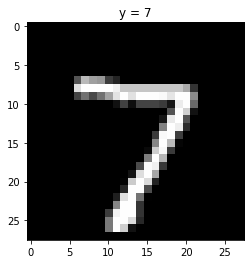

In [ ]:
# Plot the first element in the dataset

show_data(dataset[0])

We can apply some image transform (like crop, flip, resize, normalize) functions on the MNIST dataset.

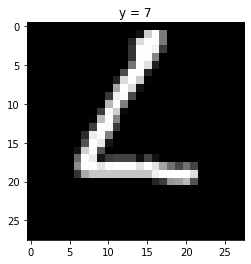

In [ ]:
fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1), transforms.RandomVerticalFlip(p = 1),  transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)
show_data(dataset[0])

Let's try another dataset. [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='https://drive.google.com/uc?export=view&id=1tlteoueR1IR20N4sjeyFKupKjCF9Ycpw' width=500px>

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                # transforms.Resize((28,28)),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = dsets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
# Explore dataset

print("Type of the first element: ", type(trainset[0]))
print("The length of the tuple: ", len(trainset[0]))
print("The shape of the first element in the tuple: ", trainset[0][0].shape)
print("The type of the first element in the tuple", type(trainset[0][0]))
print("The second element in the tuple: ", trainset[0][1])
print("The type of the second element in the tuple: ", type(trainset[0][1]))

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  9
The type of the second element in the tuple:  <class 'int'>


torch.Size([64, 1, 28, 28]) torch.Size([64])


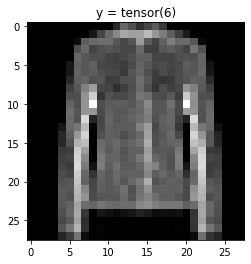

In [ ]:
images, labels = next(iter(trainloader))
print(images.shape, labels.shape)
show_data((images[1], labels[1]))

## Calculate Derivatives with Pytorch

In [ ]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


In [ ]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


In [ ]:
y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


The preceding lines perform the following operation: 

$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$

We can also calculate <b>Partial Derivatives</b>. Consider the function: $f(u,v)=vu+u^{2}$

Let us create <code>u</code> tensor, <code>v</code> tensor and  <code>f</code> tensor

In [ ]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
g = u * v + u ** 3
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


In [ ]:
# Calculate the derivative with respect to u

f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


In [ ]:
g.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(9.)


the expression is given by:

$\frac{\mathrm{\partial f(u,v)}}{\partial {u}}=v+2u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {u}}=2+2(1)=4$

In [ ]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(2.)


The equation is given by:

$\frac{\mathrm{\partial f(u,v)}}{\partial {v}}=u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {v}}=1$

### Practice

Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f= 2u + uv +(uv)^2$

In [ ]:
## TODO

## Linear regression with Tensors and Gradient calculation

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
        plt.show()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [ ]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

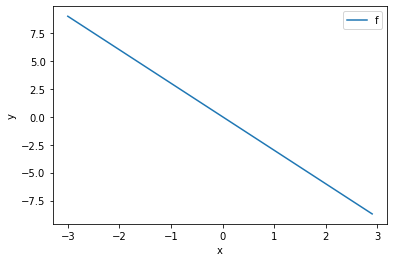

In [ ]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

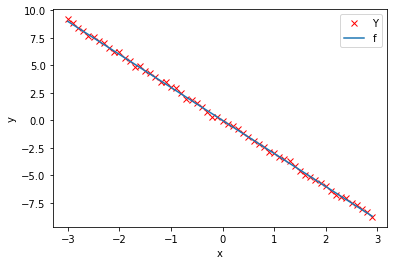

In [ ]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h3 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h3>

First, define the <code>forward</code> function $y=w*x$. Without bias for simplicity.

In [ ]:
# Create forward function for prediction

def forward(x):
    return w * x

In [ ]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [ ]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [ ]:
# create a model parameter by setting requires_grad to  True because the system must learn it.
w = torch.tensor(-10.0, requires_grad = True)

In [ ]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [ ]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

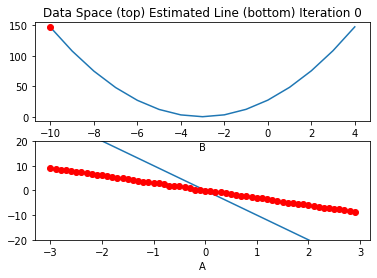

<Figure size 432x288 with 0 Axes>

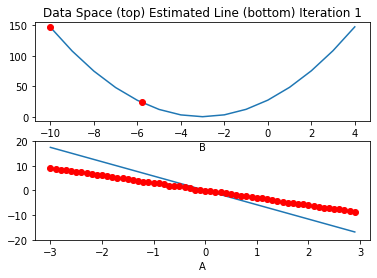

<Figure size 432x288 with 0 Axes>

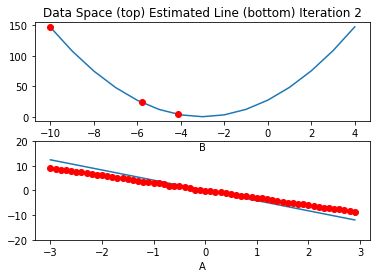

<Figure size 432x288 with 0 Axes>

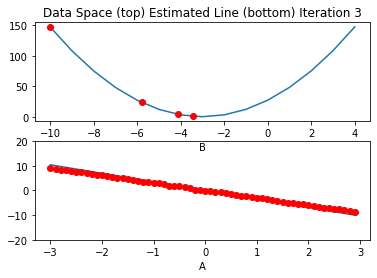

<Figure size 432x288 with 0 Axes>

In [ ]:
# Give 4 iterations for training the model here.

train_model(4)

Text(24.0, 0.5, 'Cost')

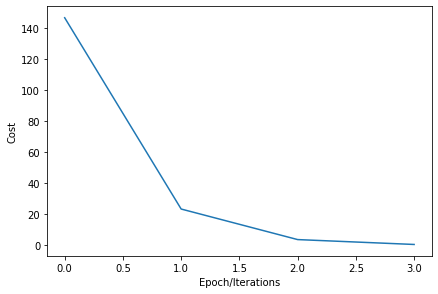

In [ ]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

## Linear Regression with Linear Class and Pytorch Modules

The linear class can be used to make a prediction. We can also use the linear class to build more complex models. Let's import the module:

In [ ]:
# Import Class Linear

import torch
from torch.nn import Linear


In [ ]:
# Create Linear Regression Model, and print out the parameters

lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))

Parameters w and b:  [Parameter containing:
tensor([[-0.5383]], requires_grad=True), Parameter containing:
tensor([0.0778], requires_grad=True)]


This is equivalent to the following expression:  

$b=-0.44, w=0.5153$

$\hat{y}=-0.44+0.5153x$

In [ ]:
# Make the prediction at x = [[1.0]]

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[-0.4605]], grad_fn=<AddmmBackward>)


In [ ]:
# Create the prediction using linear model

x = torch.tensor([[2.0], [3.0]])
yhat = lr(x)
print("The prediction: \n", yhat)

The prediction: 
 tensor([[-0.9988],
        [-1.5371]], grad_fn=<AddmmBackward>)


Now, let's build a custom module. We can make more complex models by using this method later.

In [ ]:
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Customize Linear Regression Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[0.1964]], requires_grad=True), Parameter containing:
tensor([-0.9660], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


In [ ]:
# Build in cost function

criterion = nn.MSELoss()

In [ ]:
# Create optimizer, that will optimize model parameters

model = LR(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

Lets's make some data. Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate. Add some noise to the data:

In [ ]:
# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.
                                            x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [ ]:
# Create dataset object

dataset = Data()

In [ ]:
# Create Dataloader object

trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [ ]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [ ]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        c_loss = 0
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            c_loss +=loss.item()            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
        print(f'Loss at {epoch} epoch:' , c_loss) 

train_model_BGD(10)

Loss at 0 epoch: 8542.2266268573
Loss at 1 epoch: 335.27759963274
Loss at 2 epoch: 30.55447981497855
Loss at 3 epoch: 3.105952565179905
Loss at 4 epoch: 0.8271146544374499
Loss at 5 epoch: 0.6383005124903036
Loss at 6 epoch: 0.6224139919077203
Loss at 7 epoch: 0.6210059176478353
Loss at 8 epoch: 0.620861065380268
Loss at 9 epoch: 0.6208412703022077


## Activation functions

Neural network can be considered as a universal approximator. To approximate a non-linear function, we can combine several (linear) layers with the activation functions that must be non-linear. Here are a few  examples of common activation functions: [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function), [Tanh](https://functions.wolfram.com/ElementaryFunctions/Tanh/introductions/Tanh/ShowAll.html) (hyperbolic tangent), and [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (rectified linear unit).

<img src="https://drive.google.com/uc?export=view&id=1tlTwLU0s54gT5bkUNmiJRm9A0Z3ZGU2_" width=700px>



In [ ]:
from matplotlib import pyplot as plt 

In [ ]:
# Create Non-linear Data Class

class NData(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x**2 - 2
        self.y = self.f + 0.1 * torch.randn(self.
                                            x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [ ]:
dataset = NData()

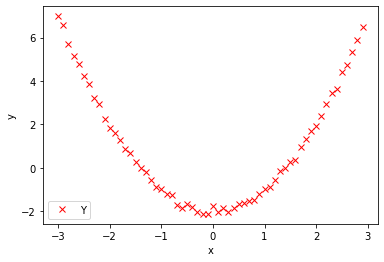

In [ ]:
# Plot the data points

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'Y')

# plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Define network

import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(1, 3)        
        self.output = nn.Linear(3, 1)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = torch.sigmoid(self.hidden(x))
        
        x = self.output(x)
        
        return x

In [ ]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [ ]:
# Build in cost function

criterion = nn.MSELoss()

In [ ]:
# Create optimizer, that will optimize model parameters

model = Network()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        c_loss = 0
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            c_loss +=loss.item()            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
        if epoch % 10 == 0:
            print(f'Loss at {epoch} epoch:' , c_loss)

train_model_BGD(100)

Loss at 0 epoch: 449.73052695702063
Loss at 10 epoch: 350.16075961571187
Loss at 20 epoch: 288.29026041860925
Loss at 30 epoch: 144.94220906309783
Loss at 40 epoch: 54.29665564233437
Loss at 50 epoch: 25.143932169143227
Loss at 60 epoch: 14.928708732884843
Loss at 70 epoch: 10.647526425062097
Loss at 80 epoch: 8.545831083938538
Loss at 90 epoch: 7.366971287177876


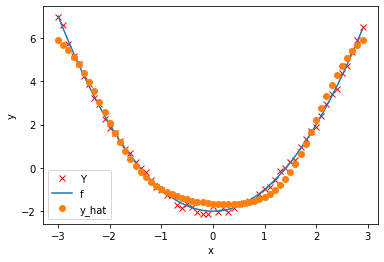

In [ ]:
# Plot the data points

yhat = model(dataset.x)

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'Y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.plot(dataset.x.numpy(), yhat.detach().numpy(), 'o', label = 'y_hat')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
model.parameters

<bound method Module.parameters of Network(
  (hidden): Linear(in_features=1, out_features=3, bias=True)
  (output): Linear(in_features=3, out_features=1, bias=True)
)>

In [ ]:
model.state_dict()

OrderedDict([('hidden.weight', tensor([[ 2.6106],
                      [-1.0154],
                      [-2.3980]])),
             ('hidden.bias', tensor([-5.3153, -1.6921, -5.1085])),
             ('output.weight', tensor([[8.6677, 1.5689, 7.4541]])),
             ('output.bias', tensor([-1.9774]))])

In [ ]:
model(torch.tensor([[-3.0]]))

tensor([[5.8998]], grad_fn=<AddmmBackward>)

## Train Neural Network on Fashion MNIST

Fashion MNIST dataset contains 10 classes, so our model will predict probability of each class. To calculate this probability distribution, we often use the [**softmax** function](https://en.wikipedia.org/wiki/Softmax_function). Mathematically this looks like

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.


In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                # transforms.Resize((28,28)),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = dsets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
# Create a basic network 

import torch
from torch import nn
import torch.nn.functional as F

class CNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # flatten image, 28*28 = 784
        x = x.view(x.shape[0], -1)
        # Hidden layer with sigmoid activation
        x = torch.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.log_softmax(self.output(x), dim=1)
        
        return x

In [ ]:
model2 = CNetwork()
model2.to(device)

CNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
model2(next(iter(trainloader))[0].to(device)).shape

torch.Size([64, 10])

We will use [Negative Log Loss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html) as a criterion to train our model.

In [ ]:
# Define the loss
criterion = nn.NLLLoss()

In [ ]:
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model2.parameters(), lr=0.005)

In [ ]:
epochs = 15
steps = 0

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:        
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        
        log_ps = model2(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        ## Calculate validation pass and print out the validation accuracy
        for test_images, test_labels in testloader:
          test_images, test_labels = test_images.to(device), test_labels.to(device)

          with torch.no_grad():
            log_ps = model2(test_images)
          test_loss += criterion(log_ps, test_labels)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class.view(*test_labels.shape) == test_labels
          accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print(f'Epoch: {e+1}')
        print(f'Train Loss: {running_loss/len(trainloader)}')
        print(f'Test Loss: {test_loss/len(testloader)}')
        print(f'Test Accuracy: {accuracy.item()/len(testloader)}')

Epoch: 1
Train Loss: 0.5115378495218403
Test Loss: 0.4758179485797882
Test Accuracy: 0.8279259554140127
Epoch: 2
Train Loss: 0.4341085107246442
Test Loss: 0.5060297250747681
Test Accuracy: 0.8125995222929936
Epoch: 3
Train Loss: 0.4184760730276738
Test Loss: 0.431025892496109
Test Accuracy: 0.8476313694267515
Epoch: 4
Train Loss: 0.4011985765877309
Test Loss: 0.4602818191051483
Test Accuracy: 0.8321058917197452
Epoch: 5
Train Loss: 0.3947762419451783
Test Loss: 0.4410627782344818
Test Accuracy: 0.8461385350318471
Epoch: 6
Train Loss: 0.38608799803295113
Test Loss: 0.4212830662727356
Test Accuracy: 0.8496218152866242
Epoch: 7
Train Loss: 0.37405255841198504
Test Loss: 0.4186130166053772
Test Accuracy: 0.8518113057324841
Epoch: 8
Train Loss: 0.37069640812207894
Test Loss: 0.4194916784763336
Test Accuracy: 0.8504179936305732
Epoch: 9
Train Loss: 0.3663177795088622
Test Loss: 0.4539019763469696
Test Accuracy: 0.8390724522292994
Epoch: 10
Train Loss: 0.3589414420015395
Test Loss: 0.46087360

In [ ]:
# Alternative model declaration approach

from torch import nn

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)

In [ ]:
# Define the loss
criterion = nn.NLLLoss()

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.005)

epochs = 15
steps = 0

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:        
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()        
    else:
        test_loss = 0
        accuracy = 0
        ## Calculate validation pass and print out the validation accuracy
        for test_images, test_labels in testloader:
          test_images, test_labels = test_images.to(device), test_labels.to(device)
          test_images = test_images.view(test_images.shape[0], -1)
          with torch.no_grad():
            log_ps = model(test_images)
          test_loss += criterion(log_ps, test_labels)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class.view(*test_labels.shape) == test_labels
          accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print(f'Epoch: {e+1}')
        print(f'Train Loss: {running_loss/len(trainloader)}')
        print(f'Test Loss: {test_loss/len(testloader)}')
        print(f'Test Accuracy: {accuracy.item()/len(testloader)}')

Epoch: 1
Train Loss: 0.5011102637565975
Test Loss: 0.5265807509422302
Test Accuracy: 0.8043391719745223
Epoch: 2
Train Loss: 0.41345067431868265
Test Loss: 0.42222726345062256
Test Accuracy: 0.8499203821656051
Epoch: 3
Train Loss: 0.3819842328236047
Test Loss: 0.4079071879386902
Test Accuracy: 0.8530055732484076
Epoch: 4
Train Loss: 0.36104731105252114
Test Loss: 0.4305514395236969
Test Accuracy: 0.8519108280254777
Epoch: 5
Train Loss: 0.35190073451571374
Test Loss: 0.40622663497924805
Test Accuracy: 0.8556926751592356
Epoch: 6
Train Loss: 0.33418320323517325
Test Loss: 0.41562721133232117
Test Accuracy: 0.8559912420382165
Epoch: 7
Train Loss: 0.3283408347890575
Test Loss: 0.4047263562679291
Test Accuracy: 0.8599721337579618
Epoch: 8
Train Loss: 0.32364758830080664
Test Loss: 0.4495221972465515
Test Accuracy: 0.8462380573248408
Epoch: 9
Train Loss: 0.3157082704354578
Test Loss: 0.45159170031547546
Test Accuracy: 0.8478304140127388
Epoch: 10
Train Loss: 0.30878278515391006
Test Loss: 0.

## Saving and Loading

In [ ]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
) 

The state dict keys: 

 odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '4.weight', '4.bias'])


In [ ]:
# save model

torch.save(model.state_dict(), 'checkpoint.pth')

In [ ]:
# load state dict for a model
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '4.weight', '4.bias'])


In [ ]:
# load saved weights

model.load_state_dict(state_dict)

<All keys matched successfully>

### Practice

Create your own Neural Network with several linear layers and Relu activation. Train it on a Fashion MNIST Dataset and try to achieve more than 0.87 on test data.

Advanced: try to add dropout to your network and early stopping to your training pipeline. See in Pytorch [documentation](https://pytorch.org/docs/stable/index.html). 

In [ ]:
## TODO